Falls are the leading cause of injury for adults ages 65 years and older.1 Over 14 million, or 1 in 4 older adults report falling every year.  

Working with the datasets: data-table.csv and Deaths from Falls 2021.csv to work through data analytics, time series and predictive analytics, this data is from the Center for Disease Control. My initial goal is to merge the data based upon Year and State, then work through a series of data cleaning, EDA, handle imbalances, test and train the model, refine the model with SMOTE, and prodictive analystics for 2024.

I'll need to define the target variable as the number of deaths caused by falls per state per year. This would typically be a continuous variable (if predicting counts) or a binary variable (if predicting whether deaths exceed a certain threshold).

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the first dataset (data_table)
data_table = pd.read_csv('data-table.csv')

In [3]:
# Load the second dataset (deaths_from_falls)
deaths_from_falls = pd.read_csv('Deaths from Falls 2021.csv')

In [4]:
# Now merge the datasets  
merged_data = pd.merge(data_table, deaths_from_falls, on=['Year', 'State'], how='inner')

**EDA**  helps identify trends, distributions, and relationships in the dataset, crucial for understanding the context of falls and deaths.

In [5]:
# Display the merged data  
merged_data.head()

,Year,State,Percentage of older adults who fell,Number of older adults who fell,"Falls death rate per 100,000",Number of deaths
0,2012.0,Alabama,29.8,"200,754",24.1,160
1,2012.0,Alaska,32.2,"21,489",Unreliable**,14
2,2012.0,Arizona,27.7,"248,038",75,688
3,2012.0,Arkansas,31.3,"135,149",50.5,212
4,2012.0,California,30.7,"1,203,358",38.6,1839


In [6]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 252 non-null    float64
 1   State                                252 non-null    object 
 2   Percentage of older adults who fell  252 non-null    float64
 3   Number of older adults who fell      252 non-null    object 
 4   Falls death rate per 100,000         252 non-null    object 
 5   Number of deaths                     252 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.9+ KB


In [7]:
merged_data.describe()

,Year,Percentage of older adults who fell,Number of deaths
count,252.000000,252.000000,252.000000
mean,2016.047619,28.985714,585.845238
std,2.816732,3.075846,567.996791
min,2012.000000,19.900000,14.000000
25%,2014.000000,26.900000,192.000000
50%,2016.000000,28.900000,375.500000
75%,2018.000000,31.200000,808.000000
max,2020.000000,38.000000,3356.000000


In [8]:
print(merged_data.dtypes)

Year                                   float64
State                                   object
Percentage of older adults who fell    float64
Number of older adults who fell         object
Falls death rate per 100,000            object
Number of deaths                         int64
dtype: object


In [9]:
# Check for missing values in the entire DataFrame  
missing_values = merged_data.isnull().sum()

# Display columns with missing values  
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [10]:
# Correlation heatmap  
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [11]:
# Select only numeric columns for correlation  
numeric_data = merged_data.select_dtypes(include=['float64', 'int64'])

In [12]:
# Drop rows with any missing values in numeric columns  
numeric_data = numeric_data.dropna()

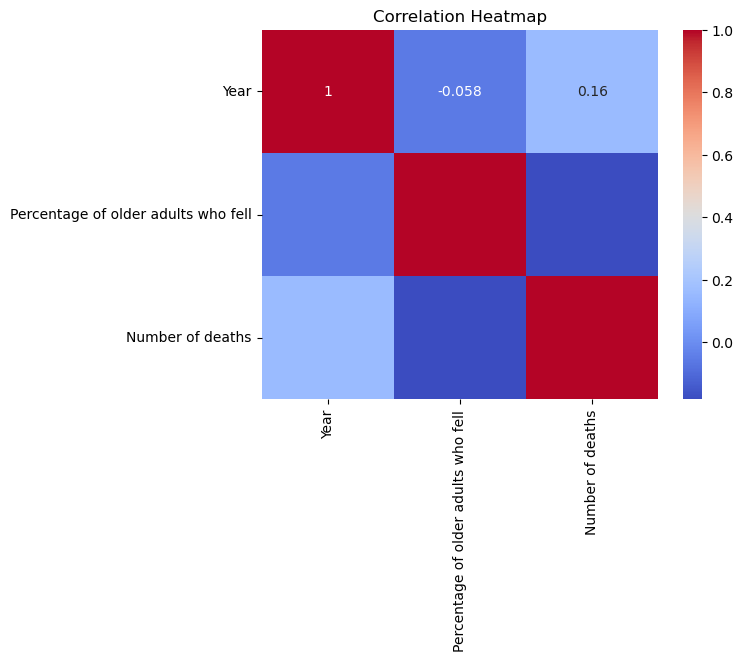

In [13]:
# Generate the correlation heatmap  
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# Group the data by state and sum the number of deaths  
deaths_per_state = merged_data.groupby('State')['Number of deaths'].sum().reset_index()

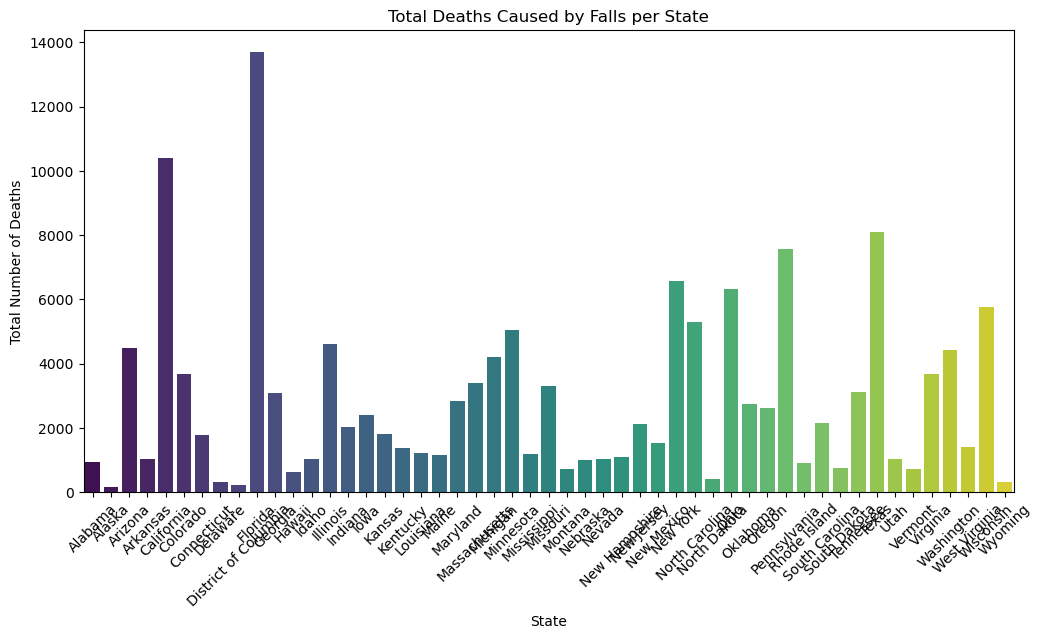

In [15]:
# Visualize the distribution of deaths caused by falls per state  
plt.figure(figsize=(12, 6))
sns.barplot(data=deaths_per_state, x='State', y='Number of deaths', palette='viridis')
plt.title('Total Deaths Caused by Falls per State')
plt.xlabel('State')
plt.ylabel('Total Number of Deaths')
plt.xticks(rotation=45)  # Rotate state names for better readability  
plt.show()

In [16]:
# Group the data by state and year, summing the number of deaths  
deaths_per_state_year = merged_data.groupby(['State', 'Year'])['Number of deaths'].sum().reset_index()

In [17]:
# Create a pivot table for better visualization  
pivot_table = deaths_per_state_year.pivot(index='State', columns='Year', values='Number of deaths').fillna(0)

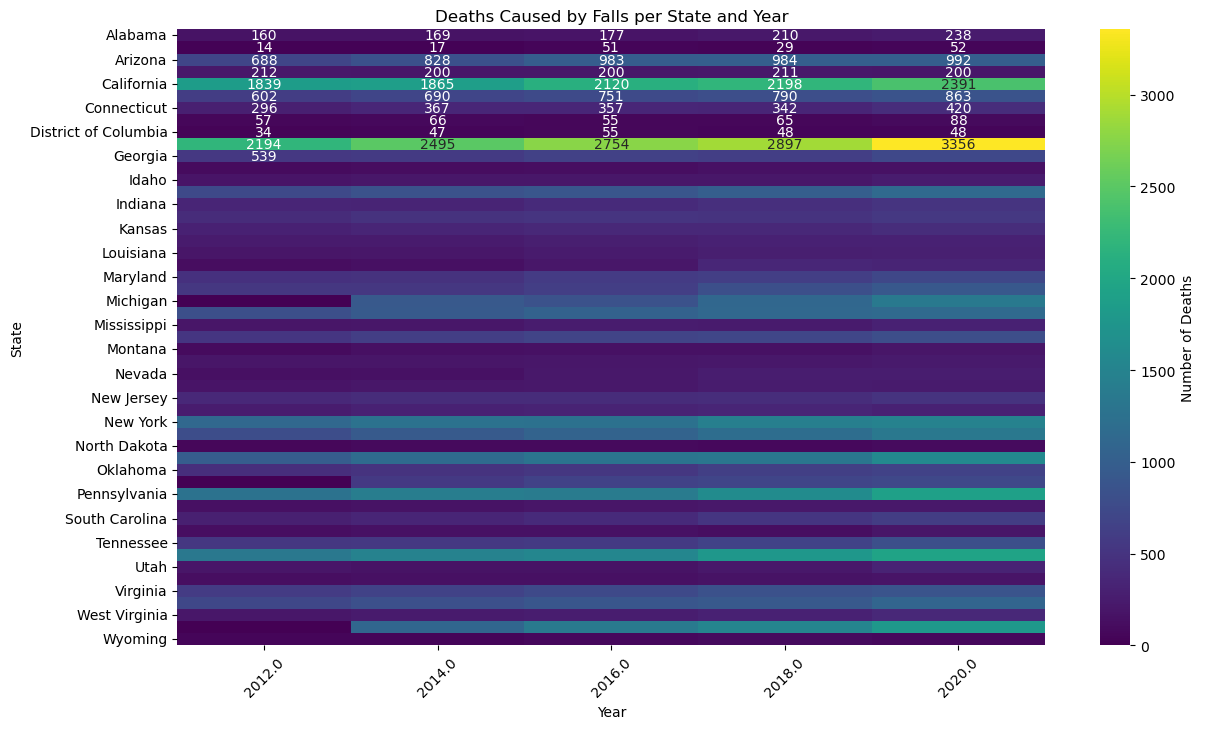

In [18]:
# Visualize the total deaths caused by falls per state and year using a heatmap  
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='viridis', cbar_kws={'label': 'Number of Deaths'})
plt.title('Deaths Caused by Falls per State and Year')
plt.xlabel('Year')
plt.ylabel('State')
plt.xticks(rotation=45)  
plt.show()

In [19]:
print(merged_data['Year'].unique())

[2012. 2014. 2016. 2018. 2020.]


In [20]:
most_recent_year = merged_data['Year'].max()
deaths_recent_year = merged_data[merged_data['Year'] == most_recent_year]

In [21]:
# Group by state and sum the number of deaths for the most recent year  
top_deaths_recent_year = deaths_recent_year.groupby('State')['Number of deaths'].sum().reset_index()

In [22]:
# Sort and select the top 10 states  
top_deaths_recent_year = top_deaths_recent_year.sort_values(by='Number of deaths', ascending=False).head(10)

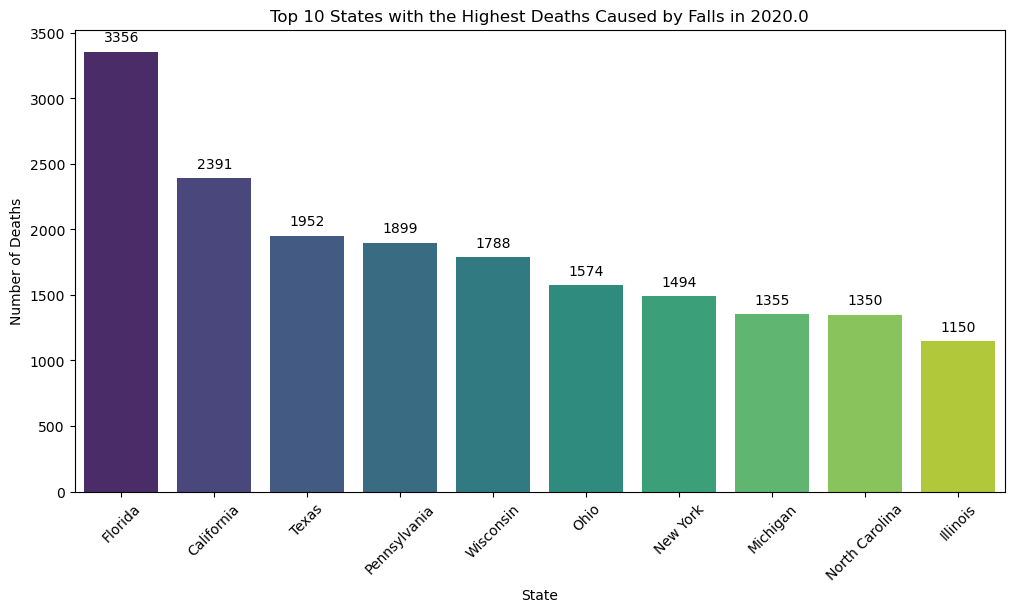

In [23]:
# Visualize data 
if not top_deaths_recent_year.empty:
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=top_deaths_recent_year, x='State', y='Number of deaths', palette='viridis')
    plt.title(f'Top 10 States with the Highest Deaths Caused by Falls in {most_recent_year}')
    plt.xlabel('State')
    plt.ylabel('Number of Deaths')
    plt.xticks(rotation=45)

    # Add the number values on top of the bars  
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    fontsize=10, color='black', 
                    xytext=(0, 5),  # Offset text slightly above the bar  
                    textcoords='offset points')

    plt.show()


**Balancing the Data** If there are significantly more records for some states or years than others, balancing the data ensures the model learns effectively from all classes.

In [24]:
from sklearn.utils import resample

In [25]:
state_counts = merged_data['State'].value_counts()
print(state_counts)

State
Alabama                 5
Alaska                  5
Nevada                  5
New Hampshire           5
New Jersey              5
New Mexico              5
New York                5
North Carolina          5
North Dakota            5
Ohio                    5
Oklahoma                5
Pennsylvania            5
Rhode Island            5
South Carolina          5
South Dakota            5
Tennessee               5
Texas                   5
Utah                    5
Vermont                 5
Virginia                5
Washington              5
West Virginia           5
Wyoming                 5
Nebraska                5
Montana                 5
Missouri                5
Idaho                   5
Arizona                 5
Arkansas                5
California              5
Colorado                5
Connecticut             5
Delaware                5
District of Columbia    5
Florida                 5
Georgia                 5
Mississippi             5
Hawaii                  5
Illino

Balancing Techniques: <br>

Under-sampling: Remove some instances from the majority class. <br>
Over-sampling: Duplicate instances from the minority class (e.g., using SMOTE). <br>
Synthetic Data Generation: Create new data points based on existing data. <br>

In [26]:
from imblearn.over_sampling import SMOTE

Defining the feature set, I'm looking to predict the number of deaths, so i'm setting up my features and target variables. 

In [27]:
# Define features (X) and target (y)  
X = merged_data.drop('Number of deaths', axis=1)  # Features (drop the target variable)
y = merged_data['Number of deaths']  # Target variable

Handle Categorical Variables: If features contain categorical variables (like State), they'll need to convert to numerical format using one-hot encoding or label encoding.

In [28]:
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical variables

**SMOTE**
Synthetic Data Generation: SMOTE generates synthetic examples of the minority class by interpolating between existing minority class instances. Instead of simply duplicating minority instances, it creates new ones based on the feature space.

How It Works:

For each instance in the minority class, SMOTE identifies its k-nearest neighbors.
It randomly selects one of these neighbors and creates a synthetic instance by interpolating between the two instances.
This process continues until the desired balance between classes is achieved.
Benefits:

Reduces the risk of overfitting that can occur with simple duplication of minority class instances.
Helps improve model performance by providing a more balanced dataset, which can lead to better generalization.
Applications: SMOTE is commonly used in various fields, including healthcare, finance, and fraud detection, where class imbalance is prevalent.

Limitations:

May introduce noise if not carefully applied, especially in high-dimensional spaces.
Requires careful tuning of parameters, such as the number of nearest neighbors (k).
Overall, SMOTE is a powerful technique for improving the performance of machine learning models when dealing with imbalanced datasets.

In [29]:
print(y.value_counts())

Number of deaths
200     4
342     3
212     3
147     2
48      2
       ..
1485    1
165     1
139     1
668     1
77      1
Name: count, Length: 227, dtype: int64


Grouping the target variable into broader categories or bins. For example, you could categorize the Number of deaths into ranges (e.g., low, medium, high) instead of using exact counts. This will reduce the number of unique classes and make it easier to apply SMOTE.

In [30]:
# Binning  
bins = [0, 100, 300, 600, 1000, 1500, np.inf]
labels = ['0-100', '101-300', '301-600', '601-1000', '1001-1500', '1500+']
merged_data['Death Category'] = pd.cut(merged_data['Number of deaths'], bins=bins, labels=labels)
y = merged_data['Death Category']

In [31]:
print(y.value_counts())

Death Category
101-300      79
301-600      56
601-1000     48
0-100        26
1001-1500    25
1500+        18
Name: count, dtype: int64


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# Define features (X) and target (y) again if necessary  
X = merged_data.drop(['Number of deaths', 'Death Category'], axis=1)  
y = merged_data['Death Category']

In [34]:
# One-hot encode categorical features if needed  
X = pd.get_dummies(X, drop_first=True)

In [35]:
# Apply SMOTE  
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [36]:
# Check the new class distribution  
print(y_resampled.value_counts())

Death Category
0-100        79
101-300      79
301-600      79
601-1000     79
1001-1500    79
1500+        79
Name: count, dtype: int64


In [37]:
 from sklearn.ensemble import RandomForestClassifier  
 from sklearn.metrics import classification_report

In [38]:
 X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [39]:
 model = RandomForestClassifier(random_state=42)
 model.fit(X_train, y_train)

 # Make predictions  
 y_pred = model.predict(X_test)

 # Evaluate the model  
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       0-100       1.00      0.93      0.97        15
   1001-1500       1.00      1.00      1.00        17
     101-300       0.85      0.94      0.89        18
       1500+       1.00      1.00      1.00        15
     301-600       0.92      0.92      0.92        13
    601-1000       1.00      0.94      0.97        17

    accuracy                           0.96        95
   macro avg       0.96      0.96      0.96        95
weighted avg       0.96      0.96      0.96        95



What is the classification report information providing insights into. <br>

* Precision: The ratio of true positive predictions to the total predicted positives. High precision indicates that the model is good at minimizing false positives. <br>
* Recall: The ratio of true positive predictions to the total actual positives. High recall indicates that the model is effective at identifying all relevant instances. <br>
* F1-Score: The harmonic mean of precision and recall, balancing the two metrics. <br>
* Support: The number of actual occurrences of each class in the test set. <br>

*High Precision and Recall:* Categories like 0-100, 1001-1500, and 1500+ have perfect precision and recall, indicating that the model can accurately predict these classes. <br>
*Moderate Performance:* The 101-300 and 301-600 categories have lower precision and recall, suggesting that there may be some confusion between these classes. <br>
*Overall Accuracy:* The model achieved an overall accuracy of 96%, which is quite good. <br>

Let's try to refine this a bit with some Hyperparameter Tuning. This technique will help find the best fit parameters for the model using Grid Search or Random Search. 

In [40]:
 from sklearn.model_selection import GridSearchCV

In [41]:
 param_grid = {
     'n_estimators': [100, 200],
     'max_depth': [None, 10, 20],
     'min_samples_split': [2, 5],
 }

 grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
 grid_search.fit(X_train, y_train)
 print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


This indicates the optimal settings found for the Random Forest model based on the grid search. Here's what each parameter means: <br>

max_depth: None <br>
This means that the trees in the forest can grow to their maximum depth without any restrictions. In other words, there is no limit on how deep the trees can go. This can help capture complex patterns in the data but may also lead to overfitting. <br>
 
min_samples_split: 5 <br>
This parameter specifies the minimum number of samples to split an internal node. Setting it to 5 means a node will be split if it has at least 5 samples. This default value allows the model to create more splits, potentially capturing more detail in the data. <br>

n_estimators: 100 <br>
This indicates that the model will use 100 decision trees in the ensemble. More trees generally improve the model's performance and stability but also increase computational cost and training time. <br>

The best parameters suggest that your Random Forest model will have unrestricted tree depth, allow splits with as few as 5 samples, and consist of 100 trees. These settings are aimed at optimizing the model's predictive performance while balancing complexity and overfitting <br>

Feature Importance: Analyze the importance of features to understand which features contribute most to the predictions. <br>


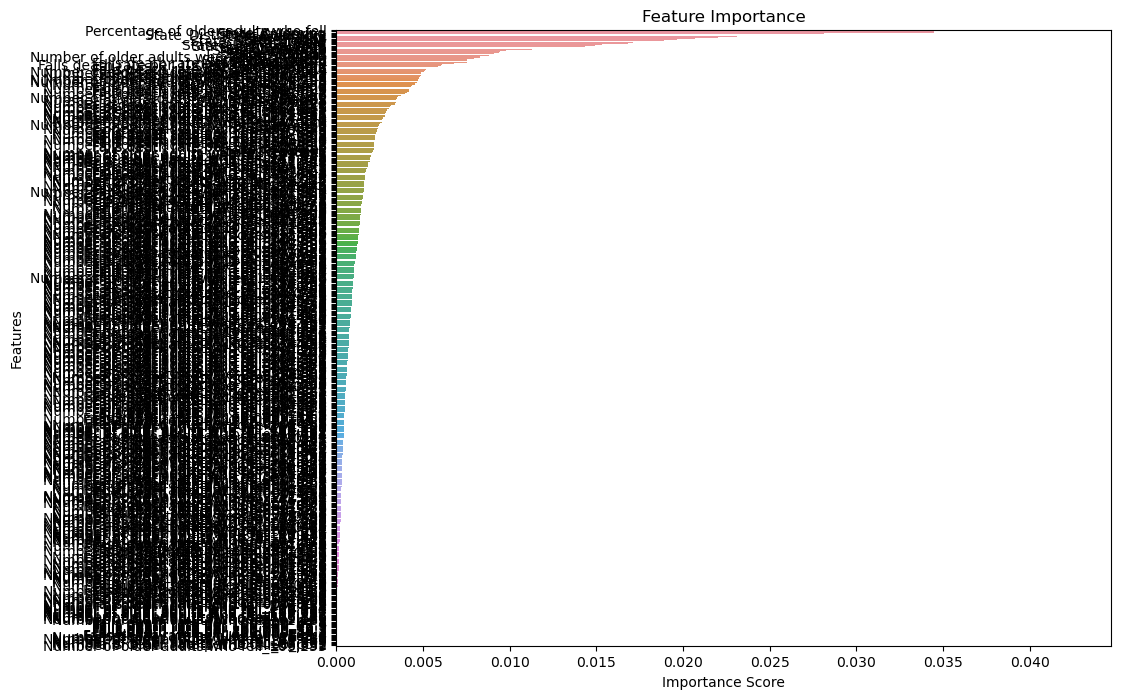

In [42]:
 importances = model.feature_importances_
 feature_names = X.columns  
 feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
 feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

 # Visualize feature importance  
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

this is pretty cluttered, let's limit the values

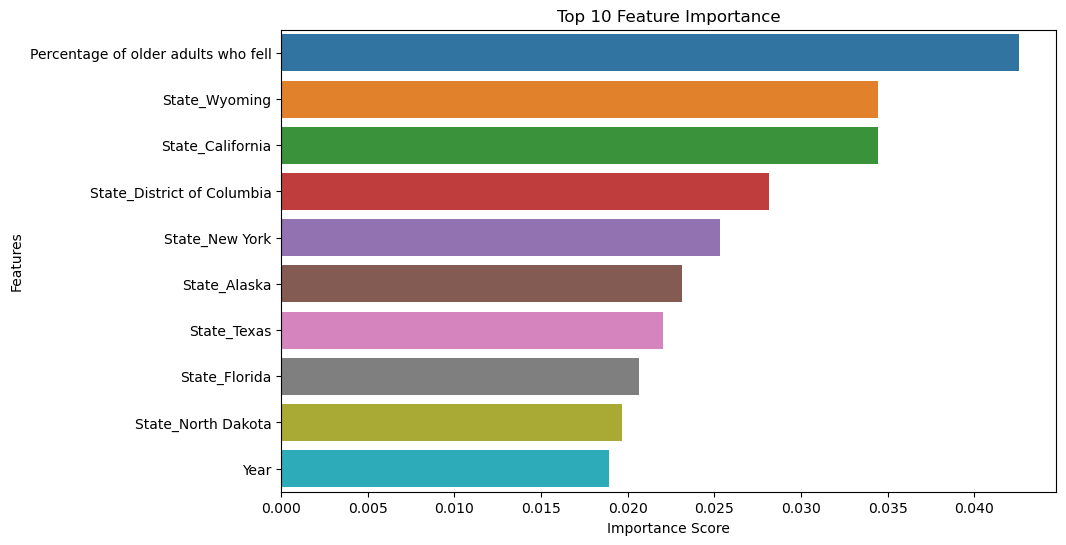

In [43]:
top_n = 10  # Change this to the number of top features you want to display  
top_features = feature_importance_df.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title(f'Top {top_n} Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

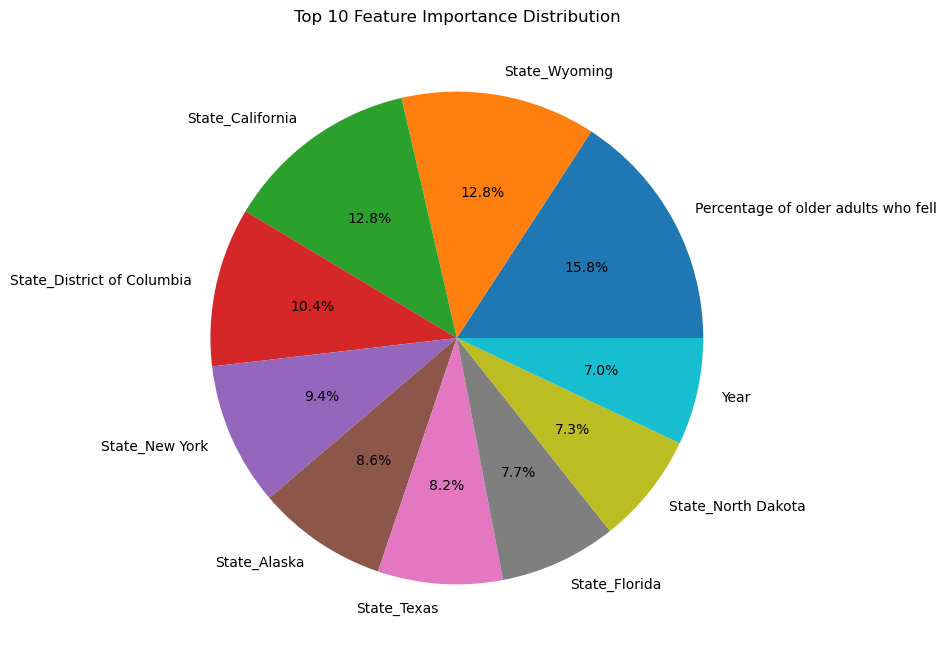

In [44]:
# Select top features   - Tufte would have my head for this: 
top_features = feature_importance_df.head(top_n)

plt.figure(figsize=(8, 8))
plt.pie(top_features['Importance'], labels=top_features['Feature'], autopct='%1.1f%%')
plt.title(f'Top {top_n} Feature Importance Distribution')
plt.show()

**Predictive Analytics** Building predictive models allows one to forecast future deaths based on past data, which is vital for planning and prevention strategies.

In [47]:
merged_data['Number of older adults who fell'] = pd.to_numeric(merged_data['Number of older adults who fell'], errors='coerce')
merged_data['Falls death rate per 100,000'] = pd.to_numeric(merged_data['Falls death rate per 100,000'], errors='coerce')

In [49]:
print(merged_data.isnull().sum())

Year                                     0
State                                    0
Percentage of older adults who fell      0
Number of older adults who fell        252
Falls death rate per 100,000             2
Number of deaths                         0
Death Category                           0
dtype: int64


In [51]:
# Fill missing values with the mean (or use median)
merged_data['Falls death rate per 100,000'].fillna(merged_data['Falls death rate per 100,000'].mean(), inplace=True)

In [52]:
merged_data.drop(columns=['Number of older adults who fell'], inplace=True)

In [53]:
print(merged_data.isnull().sum())

Year                                   0
State                                  0
Percentage of older adults who fell    0
Falls death rate per 100,000           0
Number of deaths                       0
Death Category                         0
dtype: int64


In [54]:
X = merged_data[['Year', 'Percentage of older adults who fell', 'Falls death rate per 100,000']]
y = merged_data['Death Category']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train) 

RandomForestClassifier(random_state=42)

In [61]:
from sklearn.metrics import classification_report

def evaluate_and_predict(model, X_test, y_test, new_data_2024):
    # Make predictions on the test set  
    y_pred = model.predict(X_test)
    
    # Generate classification report  
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Print the classification report  
    print("Classification Report:")
    print(report)
    
    # Make predictions on the new data  
    new_predictions = model.predict(new_data_2024)
    
    return new_predictions, report

# Example usage  
new_data_2024 = pd.DataFrame({
    'Year': [2024],
    'Percentage of older adults who fell': [30.0],  
    'Falls death rate per 100,000': [95.0]  
})

# Call the function with your model, test data, and new data  
predictions, metrics = evaluate_and_predict(model, X_test, y_test, new_data_2024)

print("Predicted Death Category for 2024:", predictions)

Classification Report:
{'0-100': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3}, '1001-1500': {'precision': 0.5, 'recall': 0.16666666666666666, 'f1-score': 0.25, 'support': 6}, '101-300': {'precision': 0.47058823529411764, 'recall': 0.4, 'f1-score': 0.4324324324324324, 'support': 20}, '1500+': {'precision': 0.5, 'recall': 0.2, 'f1-score': 0.28571428571428575, 'support': 5}, '301-600': {'precision': 0.21428571428571427, 'recall': 0.3333333333333333, 'f1-score': 0.2608695652173913, 'support': 9}, '601-1000': {'precision': 0.3, 'recall': 0.375, 'f1-score': 0.33333333333333326, 'support': 8}, 'accuracy': 0.3137254901960784, 'macro avg': {'precision': 0.330812324929972, 'recall': 0.24583333333333332, 'f1-score': 0.26039160278290713, 'support': 51}, 'weighted avg': {'precision': 0.37726149283242705, 'recall': 0.3137254901960784, 'f1-score': 0.3253277025655542, 'support': 51}}
Predicted Death Category for 2024: ['301-600']


<Figure size 1000x600 with 0 Axes>

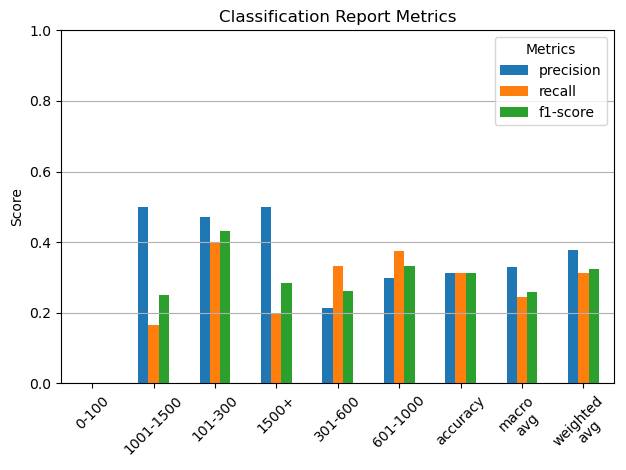

In [62]:
def plot_classification_report(report):
    # Convert the classification report to a DataFrame  
    report_df = pd.DataFrame(report).transpose()
    
    # Drop the 'support' column for visualization  
    report_df = report_df.drop(columns=['support'])

    # Set the index to be the class labels  
    report_df.index = report_df.index.str.replace(' ', '\n')  # Format class names for better visibility

    # Create a bar plot for precision, recall, and f1-score  
    plt.figure(figsize=(10, 6))
    report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    
    plt.title('Classification Report Metrics')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)  # Set y-axis limits  
    plt.grid(axis='y')

    # Add a legend  
    plt.legend(title='Metrics')
    
    # Show the plot  
    plt.tight_layout()
    plt.show()

# plot
plot_classification_report(metrics)

1. Precision, Recall, and F1-Score <br>
Precision measures the accuracy of positive predictions. A low precision indicates that many of the predicted positive instances are negative.
Recall measures the model's ability to find all relevant cases (true positives). A low recall indicates that many actual positive instances were missed.
F1-Score is the harmonic mean of precision and recall. It provides a balance between the two metrics, which is especially useful for imbalanced classes.

2. Class-Specific Insights <br>

0-100: <br>
Precision, recall, and F1-score are all 0, indicating that the model did not predict any instances for this category. This suggests that the model may not be capturing this class well. <br>

1001-1500: <br>
The precision is 0.5, meaning half of the predicted instances in this category were correct. However, recall is only 0.17, indicating that only 17% of actual instances were captured. <br>

101-300: <br>
This category performs relatively better, with a precision of 0.47 and recall of 0.4, suggesting that the model is fairly effective at identifying instances in this range. <br>

1500+: <br>
The precision is 0.5, but recall is low at 0.2, indicating that while some predictions are correct, many actual instances are missed. <br>

301-600: <br>
The model shows poor performance with a precision of 0.21 and recall of 0.33, indicating difficulty in accurately predicting this category. <br>

601-1000: <br>
Performance is moderate, with a precision of 0.3 and recall of 0.375, suggesting some effectiveness but still room for improvement. <br>

3. Overall Model Performance <br>
* Accuracy: The model's overall accuracy is about 31%, meaning it correctly predicted approximately one-third of the instances in the test set. This indicates that the model may not be performing well overall. <br>
* Macro Average: The macro average scores (precision, recall, F1-score) are relatively low, suggesting that the model struggles across multiple classes. <br> 
* Weighted Average: The weighted average considers each class's support (number of instances), providing a more nuanced view of performance but still indicating room for improvement.<br>

4. Predictions for 2024 <br>
The predicted category for 2024 is 301-600, which falls into a moderate-low death category. However, this prediction may not be highly reliable, given the model's overall performance and the low metrics for this category. <br>

Summary <br>
The classification report indicates that the model struggles with precision and recall across most categories, particularly the extremes (0-100 and 1500+). The predicted category for 2024, 301-600, suggests moderate deaths, but the low-performance metrics imply that you should interpret this prediction cautiously.<br>

Precision: Measures accuracy of positive predictions; low precision indicates many predicted positives are actually negative.
Recall: Measures the model's ability to identify all relevant cases; low recall means many actual positives are missed.
F1-Score: The harmonic mean of precision and recall, balancing both metrics, especially useful for imbalanced classes.
Class-Specific Insights:

0-100: All metrics are 0; the model fails to predict this category.
1001-1500: Precision is 0.5 (half correct), but recall is only 0.17 (17% actual captured).
101-300: Better performance with precision of 0.47 and recall of 0.4, indicating reasonable identification.
1500+: Precision is 0.5, but recall is low at 0.2, missing many actual instances.
301-600: Poor performance with precision of 0.21 and recall of 0.33.
601-1000: Moderate performance with precision of 0.3 and recall of 0.375, indicating some effectiveness.
Overall Model Performance:

Accuracy: About 31%, suggesting overall poor performance.
Macro Average: Low scores indicate struggles across multiple classes.
Weighted Average: Provides a nuanced view considering class support, but still shows the need for improvement.
Predictions for 2024:

Predicted category is 301-600 (moderate-low deaths), but reliability is questionable due to low perforperformance. <br>


References: <br>

Bishop, C. M. (2006). Pattern recognition and machine learning. Springer. <br>

Géron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems (2nd ed.). O'Reilly Media <br>

Sokolova, M., & Lapalme, G. (2009). A systematic analysis of performance measures for classification tasks. Information Processing & Management, 45(4), 427-437. https://doi.org/10.1016/j.ipm.2009.03.002 <br>

Powers, D. M. W. (2011). Evaluation: From precision, recall and F-measure to ROC, informedness, markedness & correlation. Journal of Machine Learning Technologies, 2(1), 37-63. https://www.researchgate.net/publication/220724320_Evaluation_From_Precision_Recall_and_F-MMeasure_to_ROC_Informedness_Markedness_Correlatio <br>

Scikit-learn. (n.d.). Classification metrics. Retrieved from https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics <br>

Brownlee, J. (2019). A gentle introduction to precision, recall, and F-measure for evaluating machine learning algorithms. Machine Learning Mastery. Retrieved from https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/n.